In [1]:
from keras.layers import Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Conv3D, MaxPool2D, MaxPool3D, Flatten, BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [2]:
IMAGE_SIZE = [100, 100]

# hiperparametry sieci
epochs = 3
batch_size = 32

path = 'C:\\Users\\admin\\SDA\\ComputerVision\\Projekt\\microsoft-catsvsdogs-dataset\\PetImages'


# Przyda się do określenia liczy obrazów
image_files = glob(path + '/*/*.jp*g')
folders = glob(path + '/*')

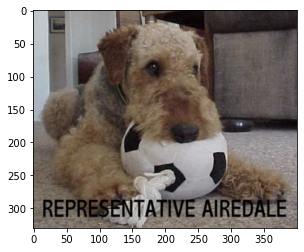

In [3]:
plt.imshow(
  image.img_to_array(
    image.load_img(
      np.random.choice(image_files)
    )
  ).astype('uint8')
)
plt.show()

In [4]:
img_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
# train_images = []
# valid_images = []
# for i in folders:
#     train_images = train_images + glob(i + '\\*.jp*g')[:1001]
#     valid_images = valid_images + glob(i + '\\*.jp*g')[-202:]  

In [6]:
# def convert_to_image(files):
#     images = []
#     for file in files:
#         images.append(image.img_to_array(
#                 image.load_img(file
#                 ), data_format = 'channels_last'
#               ).astype('uint8'))
#     return images

In [7]:
# from PIL import Image
# for imgname in train_images: 
#     try:
#         Image.open(imgname)
#     except: 
#         train_images.remove(imgname)

In [8]:
# train_images = np.asarray(convert_to_image(train_images))
# valid_images = np.asarray(convert_to_image(valid_images))

In [9]:
train_generator = img_gen.flow_from_directory(path, target_size=IMAGE_SIZE, class_mode='binary', shuffle=True, batch_size=batch_size, subset='training') # set as training data
validation_generator = img_gen.flow_from_directory(path, target_size=IMAGE_SIZE, class_mode='binary', shuffle=True, batch_size=batch_size, subset='validation') # set as validation data

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [4]:
model = Sequential()

# Pierwsza warstwa splotowa
model.add(Conv2D(
    filters=128, 
    kernel_size=(3,3), 
    input_shape=(100, 100, 3), 
    activation='relu'
    )
)

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(
    filters=56, 
    kernel_size=(3,3), 
    input_shape=(100, 100, 3), 
    activation='relu'
    )
)

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(
    filters=28, 
    kernel_size=(3,3), 
    input_shape=(100, 100, 3), 
    activation='relu'
    )
)


model.add(MaxPool2D(pool_size=(2,2)))

# Warstwa spłaszczająca
model.add(Flatten())


# Warstwa gęsta
model.add(Dense(1000, activation='relu'))

# Warstwa wyjściowa - klasyfikator
model.add(Dense(1, activation='sigmoid'))


In [5]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 56)        64568     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 56)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 28)        14140     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2800)              0

In [12]:
def my_gen(gen):
    while True:
        try:
            data, labels = next(gen)
            yield data, labels
        except:
            pass

In [13]:
train_generator = my_gen(train_generator)
validation_generator = my_gen(validation_generator)

In [14]:
model.fit(
          train_generator,
          steps_per_epoch = 20000 // batch_size,
          validation_data= validation_generator,
          validation_steps = 5000 // batch_size,
          epochs=5
    )

Epoch 1/5
292/625 [=============>................] - ETA: 7:54 - loss: 0.6844 - accuracy: 0.5906

C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffIma

625/625 [==============================] - 961s 2s/step - loss: 0.6320 - accuracy: 0.6481 - val_loss: 0.5128 - val_accuracy: 0.7411
Epoch 2/5
625/625 [==============================] - 962s 2s/step - loss: 0.5078 - accuracy: 0.7539 - val_loss: 0.4613 - val_accuracy: 0.7818
Epoch 3/5
625/625 [==============================] - 965s 2s/step - loss: 0.4428 - accuracy: 0.7964 - val_loss: 0.4622 - val_accuracy: 0.7925
Epoch 4/5
625/625 [==============================] - 871s 1s/step - loss: 0.3940 - accuracy: 0.8225 - val_loss: 0.4151 - val_accuracy: 0.8138
Epoch 5/5
625/625 [==============================] - 787s 1s/step - loss: 0.3545 - accuracy: 0.8490 - val_loss: 0.4234 - val_accuracy: 0.8287


In [6]:
model.save('my_model.h5')

In [7]:
from keras.models import load_model

new_model = load_model('my_model.h5')

In [34]:
image = ImageDataGenerator(rescale=1./255).flow_from_directory('C:\\Users\\admin\\SDA\\ComputerVision\\Projekt\\microsoft-catsvsdogs-dataset\\index', target_size=[100,100])

Found 2 images belonging to 2 classes.


In [35]:
image.samples

2

In [37]:
model.predict(image)

array([[0.51573974],
       [0.50999963]], dtype=float32)